In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

In [2]:
regions_df = pd.read_csv('out_v3/transcripts.gtf', comment='#', sep='\t', 
            names=['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'])
regions_df = regions_df[regions_df['seqname'].str.contains('DP1')]

In [3]:
exons_df = regions_df[regions_df['feature']=='exon']
exon_numbers = exons_df.apply(lambda x: int(x['attribute'].split(';')[2].split('\"')[1]), axis=1)
exons_df.insert(5, 'exon_number', exon_numbers)
exons_df

,seqname,source,feature,start,end,exon_number,score,strand,frame,attribute
1,DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,StringTie,exon,18948,24848,1,1000,-,.,"gene_id ""STRG.1""; transcript_id ""STRG.1.1""; ex..."
2,DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,StringTie,exon,24874,26535,2,1000,-,.,"gene_id ""STRG.1""; transcript_id ""STRG.1.1""; ex..."
3,DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,StringTie,exon,26632,36583,3,1000,-,.,"gene_id ""STRG.1""; transcript_id ""STRG.1.1""; ex..."
5,DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,StringTie,exon,36709,38169,1,1000,+,.,"gene_id ""STRG.2""; transcript_id ""STRG.2.1""; ex..."
6,DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,StringTie,exon,38230,38320,2,1000,+,.,"gene_id ""STRG.2""; transcript_id ""STRG.2.1""; ex..."
...,...,...,...,...,...,...,...,...,...,...
136700,DP1_NODE_87478_length_430_cov_15.2838_ID_3247630,StringTie,exon,245,387,2,1000,-,.,"gene_id ""STRG.27843""; transcript_id ""STRG.2784..."
136702,DP1_NODE_87723_length_429_cov_13.6887_ID_3248120,StringTie,exon,30,242,1,1000,-,.,"gene_id ""STRG.27844""; transcript_id ""STRG.2784..."
136703,DP1_NODE_87723_length_429_cov_13.6887_ID_3248120,StringTie,exon,268,377,2,1000,-,.,"gene_id ""STRG.27844""; transcript_id ""STRG.2784..."
136705,DP1_NODE_87817_length_429_cov_13.404_ID_3248308,StringTie,exon,38,373,1,1000,.,.,"gene_id ""STRG.27845""; transcript_id ""STRG.2784..."


In [4]:
intron_lengths = []
for i in range(len(exons_df)):
    if exons_df.iloc[i]['exon_number'] > 1:
        intron_lengths.append(exons_df.iloc[i]['start'] - exons_df.iloc[i-1]['end'])

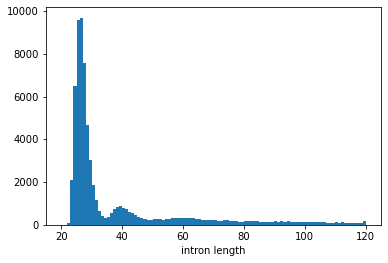

In [5]:
plt.hist(intron_lengths,bins=100,range=(20,120))
plt.xlabel('intron length')
pass

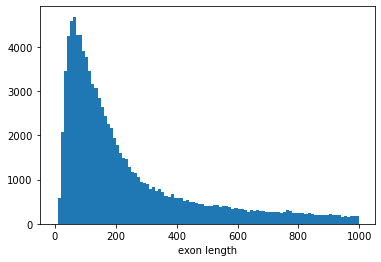

In [6]:
plt.hist(exons_df.apply(lambda x: np.abs(x['start']-x['end']),axis=1), bins=100, range=(0,1000))
plt.xlabel('exon length')
pass

In [9]:
# filter for transcripts
transcripts_df = regions_df[regions_df['feature']=='transcript']
transcripts_df.drop(['feature'], axis=1, inplace=True)

# extract isoform identifier and remove all but one isoform
iso = []
for attr in transcripts_df['attribute']:
    tmp = attr.split(';')
    iso.append(tmp[0].split('\"')[1])
transcripts_df.insert(8,'strg', iso)
transcripts_df = transcripts_df.drop_duplicates('strg')

# add length column
transcripts_df.insert(5, 'length', transcripts_df.apply(lambda x: x['end']-x['start'], axis=1))
transcripts_df

,seqname,source,start,end,score,length,strand,frame,attribute,strg
0,DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,StringTie,18948,36583,1000,17635,-,.,"gene_id ""STRG.1""; transcript_id ""STRG.1.1""; co...",STRG.1
4,DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,StringTie,36709,45911,1000,9202,+,.,"gene_id ""STRG.2""; transcript_id ""STRG.2.1""; co...",STRG.2
9,DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,StringTie,46060,50819,1000,4759,-,.,"gene_id ""STRG.3""; transcript_id ""STRG.3.1""; co...",STRG.3
13,DP1_NODE_4_length_20956_cov_11.1866_ID_3072662,StringTie,29,20912,1000,20883,+,.,"gene_id ""STRG.4""; transcript_id ""STRG.4.1""; co...",STRG.4
28,DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,StringTie,168,8181,1000,8013,.,.,"gene_id ""STRG.5""; transcript_id ""STRG.5.1""; co...",STRG.5
...,...,...,...,...,...,...,...,...,...,...
136695,DP1_NODE_87358_length_430_cov_2.13201_ID_3247390,StringTie,108,362,1000,254,+,.,"gene_id ""STRG.27842""; transcript_id ""STRG.2784...",STRG.27842
136698,DP1_NODE_87478_length_430_cov_15.2838_ID_3247630,StringTie,37,387,1000,350,-,.,"gene_id ""STRG.27843""; transcript_id ""STRG.2784...",STRG.27843
136701,DP1_NODE_87723_length_429_cov_13.6887_ID_3248120,StringTie,30,377,1000,347,-,.,"gene_id ""STRG.27844""; transcript_id ""STRG.2784...",STRG.27844
136704,DP1_NODE_87817_length_429_cov_13.404_ID_3248308,StringTie,38,373,1000,335,.,.,"gene_id ""STRG.27845""; transcript_id ""STRG.2784...",STRG.27845


In [10]:
# import fasta as dictionary
fasta = SeqIO.to_dict(SeqIO.parse("ecrassus_DP1_asm_filtered.fasta", "fasta"))
fasta = {'DP1_'+key:val for key,val in fasta.items()}

In [11]:
# compute length of chromosomes and summed length of transcripts corresponding to the chromosome
lengths = pd.DataFrame()
chromosome_ids = transcripts_df['seqname'].drop_duplicates()
lengths['chromosomes']=[len(fasta[x]) for x in chromosome_ids]
lengths.index = chromosome_ids
lengths['transcripts'] = transcripts_df.groupby('seqname').apply(lambda x: x['length'].sum())
lengths['transcripts_num'] = transcripts_df.groupby('seqname').size()
lengths

,chromosomes,transcripts,transcripts_num
seqname,,,
DP1_NODE_1_length_50899_cov_36.2793_ID_3072656,50899,39609,4
DP1_NODE_4_length_20956_cov_11.1866_ID_3072662,20956,20883,1
DP1_NODE_5_length_17939_cov_20.7119_ID_3072664,17939,17793,1
DP1_NODE_7_length_16369_cov_5.665_ID_3072668,16369,12426,5
DP1_NODE_9_length_15547_cov_9.84695_ID_3072672,15547,5806,5
...,...,...,...
DP1_NODE_87358_length_430_cov_2.13201_ID_3247390,430,254,1
DP1_NODE_87478_length_430_cov_15.2838_ID_3247630,430,350,1
DP1_NODE_87723_length_429_cov_13.6887_ID_3248120,429,347,1


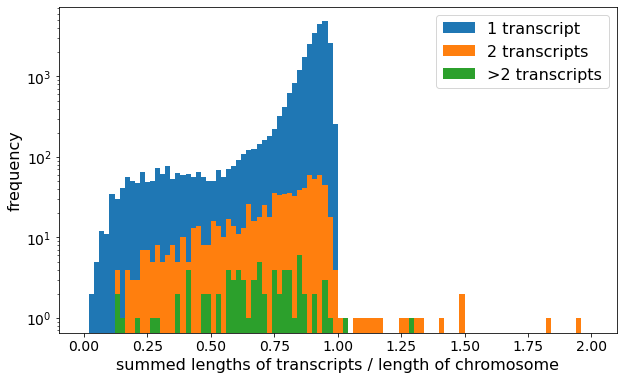

In [12]:
plt.figure(figsize=(10, 6))
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.hist(lengths[lengths['transcripts_num']==1].apply(lambda x: x['transcripts']/x['chromosomes'], axis=1), bins=100, range=(0,2))
plt.hist(lengths[lengths['transcripts_num']==2].apply(lambda x: x['transcripts']/x['chromosomes'], axis=1), bins=100, range=(0,2))
plt.hist(lengths[lengths['transcripts_num']>2].apply(lambda x: x['transcripts']/x['chromosomes'], axis=1), bins=100, range=(0,2))
plt.yscale('log')
plt.ylabel('frequency')
plt.xlabel('summed lengths of transcripts / length of chromosome')
plt.legend(['1 transcript','2 transcripts','>2 transcripts'])